In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Duplicate key in file PosixPath('/Users/dingyiyu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 758 ('font.family         : sans-serif')
Duplicate key in file PosixPath('/Users/dingyiyu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 759 ('font.sans-serif     : SimHei')
Duplicate key in file PosixPath('/Users/dingyiyu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 760 ('axes.unicode_minus  : False')


In [3]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
X,y = make_classification(n_samples=1000,n_features = 20,n_informative=17,n_redundant=3,random_state=4,scale = 50,shuffle=True)


def standardization(X):
    return (X - np.mean(X))/np.std(X)

In [4]:
X_1 = standardization(X)

scaler = MinMaxScaler()
X_2 = scaler.fit_transform(X)

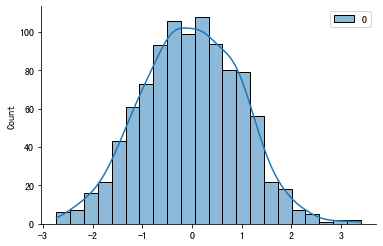

In [14]:
np.random.seed(6850)

sns.histplot(np.random.normal(0,1,size=(1000,1)),kde=True)

sns.despine()

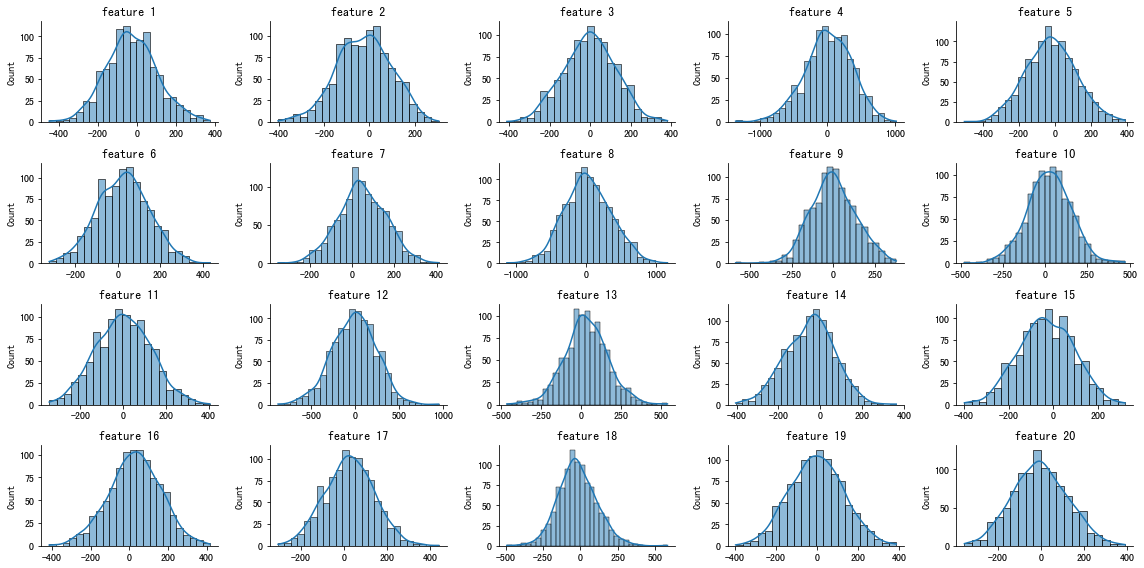

In [15]:
def distplot(X):
    n = X.shape[0]

    fig, axes = plt.subplots(4,5,figsize = (16,8))

    feature_name = 1
    for i,ax in enumerate(fig.axes):
        sns.histplot(X[:,i],ax=ax,kde=True,edgecolor = 'black')
        ax.set_title(f'feature {feature_name}')
        feature_name += 1

    sns.despine()
    plt.tight_layout()
    return fig,axes

distplot(X)
sns.despine()

In [31]:
class NeuralNetwork:
    def __init__(self, lr, n_iters, stop_criteral,random_state=None):
        self.lr = lr
        self.random_state = random_state
        self.n_iters = n_iters
        self.stop_criteral = stop_criteral
    def sigmoid(self,x, w):
        x = np.asarray(x)
        w = np.asarray(w)
        return 1 / (1 + np.exp(-np.dot(w.T, x)))

    def forward(self, X): # forward prop
        a1 = self.sigmoid(X.T, self.w0).T # layer 1 output
        a1 = np.column_stack([np.ones(a1.shape[0]), a1]) # add constant col
        a2 = self.sigmoid(a1.T, self.w1) # calculate layer 2 
        return a1, a2

    def getCost(self, X, y): #  calculate the cost
        a1, a2 = self.forward(X) 
        logloss = np.multiply(y,np.log(a2)) + np.multiply((1-y),np.log(1-a2)) 
        return - np.mean(logloss)

    # training the model
    def train(self, X, y):
        if self.random_state: # set random state, to control the varibles
            np.random.seed(self.random_state)

        n_sample, n_features = X.shape
        self.w0 = np.random.normal(0,1,size=(n_features,5))
        self.w1 = np.random.normal(0,1,size=(6,1))
        self.costs = []

        cost = self.getCost(X, y)
        self.costs.append(cost)
        cost_update = cost

        i = 0  
        for i in range(self.n_iters): 
            a1, a2 = self.forward(X) # forward 

            a2_delta = np.multiply(np.multiply((y-a2),a2),(1-a2)) # calculate gradient 
            a1_delta = np.multiply(np.dot(a2_delta.T,self.w1.T),np.multiply(a1,(1-a1)))

            self.w1 += a1.T.dot(a2_delta.T) / n_sample * self.lr 
            self.w0 += X.T.dot(a1_delta)[:,1:] / n_sample * self.lr

            i += 1  
            cost_update = cost 
            cost = self.getCost(X, y)  # get next cost
            self.costs.append(cost)
            if np.abs(cost_update-cost) < self.stop_criteral: # set a stop criterial
                break

<ipython-input-31-cac0919f9c91>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(w.T, x)))


0.415479600408819
Running time: 0.4822709560394287 Seconds


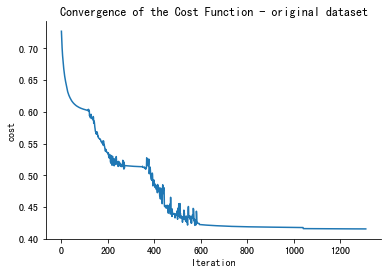

In [32]:
import time 

beg = time.time()

model = NeuralNetwork(lr=2, n_iters=50000,stop_criteral=0.000001,random_state=6850)
# Train model
model.train(X, y)
cost_origin = model.getCost(X,y)
print(cost_origin)

plt.plot(model.costs)
plt.title("Convergence of the Cost Function - original dataset")
plt.ylabel("cost")
plt.xlabel("Iteration")
sns.despine()

end = time.time()


print('Running time: %s Seconds'%(end-beg))

0.21330808954022726
Running time: 2.8072619438171387 Seconds


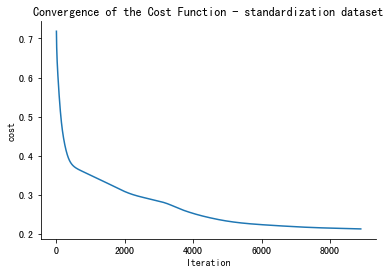

In [25]:
# Initialize model 

beg = time.time()
model.train(X_1, y)
cost_std = model.getCost(X_1,y)
print(cost_std)
plt.plot(model.costs)
plt.title("Convergence of the Cost Function - standardization dataset")
plt.ylabel("cost")
plt.xlabel("Iteration")
sns.despine()

end = time.time()


print('Running time: %s Seconds'%(end-beg))

0.15436271028578996
Running time: 14.517613887786865 Seconds


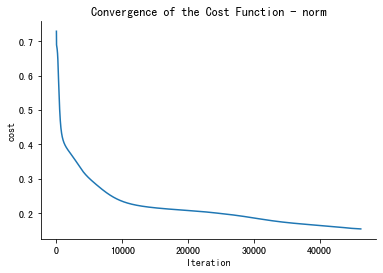

In [26]:
# Initialize model
beg = time.time()

model.train(X_2, y)

cost_norm = model.getCost(X_2,y)
print(cost_norm)

plt.plot(model.costs)
plt.title("Convergence of the Cost Function - norm")
plt.ylabel("cost")
plt.xlabel("Iteration")
sns.despine()

end = time.time()


print('Running time: %s Seconds'%(end-beg))

Running time: 0.19525718688964844 Seconds
Running time: 0.20181822776794434 Seconds
Running time: 0.32253289222717285 Seconds
Running time: 0.2004079818725586 Seconds
Running time: 0.25377583503723145 Seconds
Running time: 0.32787489891052246 Seconds
Running time: 6.086110830307007 Seconds
Running time: 0.5704913139343262 Seconds
Running time: 0.5213809013366699 Seconds
Running time: 0.5636880397796631 Seconds
Running time: 13.07499384880066 Seconds
Running time: 1.0376648902893066 Seconds
Running time: 0.7480020523071289 Seconds
Running time: 0.7186901569366455 Seconds
Running time: 11.34387493133545 Seconds
Running time: 0.5916438102722168 Seconds
Running time: 8.342217922210693 Seconds
Running time: 0.6121370792388916 Seconds
Running time: 5.755369186401367 Seconds


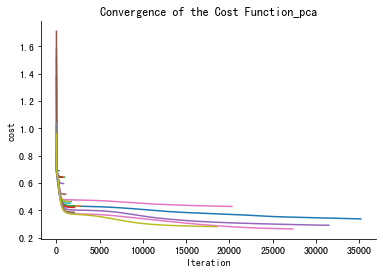

In [39]:
# Initialize model
from sklearn.decomposition import PCA

n_features = []
time_cost = []
cost_list = []
for i in range(1,20):
    pca=PCA(n_components=i)
    X_3 = pca.fit_transform(X_2)

    beg = time.time()
    
    model.train(X_3, y)
    cost_pcaTheNorm = model.getCost(X_3,y)
    plt.plot(model.costs)
    plt.title("Convergence of the Cost Function_pca")
    plt.ylabel("cost")
    plt.xlabel("Iteration")
    sns.despine()

    end = time.time()

    n_features.append(i)
    time_cost.append((end-beg))
    cost_list.append(cost_pcaTheNorm)

In [45]:
norm_cost = pd.DataFrame(data = {'number_of_features':n_features,
                     'time_costing':time_cost,
                     'cost':cost_list})

In [47]:
norm_cost.sort_values(by = 'cost')

,number_of_features,time_costing,cost
16,17,8.342218,0.264469
18,19,5.755369,0.281099
14,15,11.343875,0.291124
10,11,13.074994,0.337673
17,18,0.612137,0.377340
15,16,0.591644,0.386038
13,14,0.718690,0.421354
6,7,6.086111,0.428525
11,12,1.037665,0.431506
12,13,0.748002,0.432441


Running time: 0.14963793754577637 Seconds
Running time: 1.0580229759216309 Seconds
Running time: 1.2574231624603271 Seconds
Running time: 1.3551521301269531 Seconds
Running time: 2.9303011894226074 Seconds
Running time: 3.0479161739349365 Seconds
Running time: 1.6341807842254639 Seconds
Running time: 3.7621560096740723 Seconds
Running time: 4.508990049362183 Seconds
Running time: 2.756798028945923 Seconds
Running time: 3.928462266921997 Seconds
Running time: 4.855628967285156 Seconds
Running time: 6.430333375930786 Seconds
Running time: 3.2367770671844482 Seconds
Running time: 5.013804912567139 Seconds
Running time: 3.483649969100952 Seconds
Running time: 3.088062047958374 Seconds
Running time: 4.8691771030426025 Seconds
Running time: 5.176685094833374 Seconds


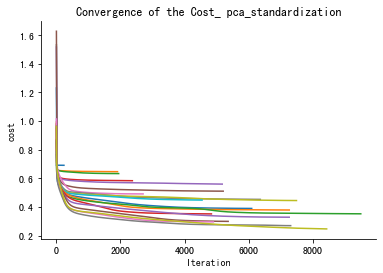

In [51]:
# Initialize model
from sklearn.decomposition import PCA

n_features = []
time_cost = []
cost_list = []

for i in range(1,20):
    pca=PCA(n_components=i)
    X_4 = pca.fit_transform(X_1)

    beg = time.time()
    
    model.train(X_4, y)

    model.train(X_4, y)
    cost_pcaTheNorm = model.getCost(X_4,y)
    plt.plot(model.costs)
    plt.title("Convergence of the Cost_ pca_standardization")
    plt.ylabel("cost")
    plt.xlabel("Iteration")
    sns.despine()
    
    end = time.time()
    n_features.append(i)
    time_cost.append((end-beg))
    cost_list.append(cost_pcaTheNorm)


    print('Running time: %s Seconds'%(end-beg))

In [53]:
standardization_cost = pd.DataFrame(data = {'number_of_features':n_features,
                     'time_costing':time_cost,
                     'cost':cost_list})
    
standardization_cost.sort_values(by = 'cost')

,number_of_features,time_costing,cost
18,19,5.176685,0.246130
17,18,4.869177,0.268954
16,17,3.088062,0.295343
15,16,3.483650,0.298849
14,15,5.013805,0.327960
13,14,3.236777,0.351049
12,13,6.430333,0.351697
11,12,4.855629,0.378315
10,11,3.928462,0.389269
8,9,4.508990,0.444521
